In [66]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
import os
import sys
from pymongo import MongoClient

sys.path.append('..')

MONGODB_URI = os.environ.get('MONGODB_URI')
database = ''.join(MONGODB_URI.rsplit('/')[-1:])
conn = MongoClient(host=MONGODB_URI)
mongodb = conn[database]


In [68]:
from carrega_modelo_final_rc import ModelContaminado

model = ModelContaminado()

In [84]:
from atualiza_mongo_rc import ComunicaReeeferContaminado

comunicador = ComunicaReeeferContaminado(model, mongodb)
def print_one():
    registro = next(comunicador.cursor)
    _id = registro['_id']
    predictions_reefer = registro['metadata']['predictions'][0]['reefer'][0]
    print(_id, predictions_reefer)
    comunicador.get_pil_image(_id)
    print(model.predict(comunicador.pil_image))


INFO:root:Consulta ao banco efetuada.


603cee9bbeb63828c35eb7a6 {'reefer_bbox': [65.21646881103516, 8.310043334960938, 152.1454315185547, 614.7932739257812], 'reefer_class': 0, 'reefer_score': 0.9907009601593018}
False


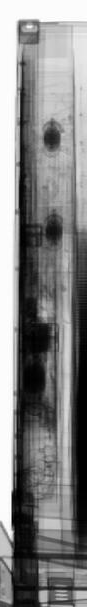

In [85]:
print_one()
comunicador.pil_image

603cee9bbeb63828c35eb756 {'reefer_bbox': [1637.6048583984375, 16.110485076904297, 1722.7371826171875, 614.8853759765625], 'reefer_class': 0, 'reefer_score': 0.9876108765602112}
False


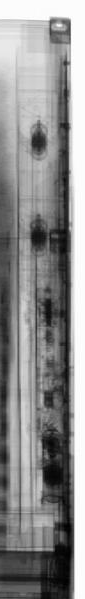

In [86]:
print_one()
comunicador.pil_image